# **Explorando el Tiempo hasta el Evento con Análisis de Supervivencia**
Introducción al Análisis de Supervivencia y su aplicación en Python

El análisis de supervivencia es una rama de la estadística que se centra en el **análisis de la duración prevista hasta que se produce un suceso**. Se ha utilizado sobre todo en el sector salud, principalmente para conocer la probabilidad de supervivencia en ensayos médicos.
Este enfoque también puede aplicarse a otros ámbitos y casos de uso con el objetivo de estudiar la probabilidad de que se produzca un determinado evento en un momento dado. En este artículo analizaremos los conceptos, técnicas y aplicaciones del Análisis de Supervivencia en Python.

**Conceptos de Análisis de Supervivencia**

Al trabajar con el Análisis de Supervivencia, es necesario definir un "suceso" y la "línea de vida" o duración de la supervivencia relacionada con el suceso.

* **Acontecimiento**: Algo que le ocurre al objeto de estudio. Debe ser inequívoco y binario, como la muerte de un objeto biológico. En ámbitos más ambiguos, como el fallo de una maquinaria, se necesita una definición clara para identificar el suceso (es decir, fallo total o productividad < X%).

* **Tiempo de vida / Duración de la supervivencia**: Tiempo que transcurre hasta que se produce el suceso de interés mencionado (o el final de las observaciones).

Con la definición anterior, podemos aplicar las técnicas del Análisis de Supervivencia a problemas sobre la **probabilidad de que se produzca un suceso en un momento determinado**. Esto incluye la proporción de la población que podría experimentar el suceso, el tiempo estimado hasta que se produzca el suceso y los factores que contribuyen a la duración y la probabilidad del suceso.

Algunos ejemplos de problemas son:

* Modelización de la conversión del usuario en miembro/compra

* Predicción del tiempo hasta el fallo de la máquina

* Probabilidad de reaparición de un cáncer en un momento dado

* Predicción del tiempo hasta la rotación de empleados



**Función de supervivencia y función de riesgo (Hazard)**

La predicción del suceso y de la duración de la supervivencia se realiza modelizando la función de supervivencia del suceso.

![Imagen 1](Images/image_1.webp)

La función de supervivencia S(t) muestra la **probabilidad de que un objeto sobreviva (no experimente el suceso) al cabo de un determinado tiempo (t)**. Se trata de una función no creciente, lo que significa que el valor disminuirá a medida que pase el tiempo.

Otra ecuación clave en el Análisis de Supervivencia es la **función de Peligro (Hazard**), que muestra la **probabilidad de que ocurra un suceso en un momento dado, dada la supervivencia (suceso que aún no ha ocurrido) hasta ese momento**. La función de peligro h(t) muestra la probabilidad de que el suceso ocurra en el instante siguiente, dado que se ha sobrevivido hasta el tiempo t.

![Imagen 2](Images/image_2.webp)

La función de peligro h(t) y la función de supervivencia S(t) **pueden derivarse una de otra**.

**Conjunto de datos para el Análisis de Supervivencia**

Dado que el Análisis de Supervivencia se centra en el "suceso" y su "línea de vida" o duración de la supervivencia, el conjunto de datos debe ser la **observación de objetos individuales**, que contenga la **ocurrencia del suceso** (binario de sí/no) y la **duración de la observación**.

Los datos también deben tener en cuenta la **censura**. La censura se produce cuando la duración de la supervivencia, o **el tiempo transcurrido hasta el suceso, sólo se conoce parcialmente** (es decir, se desconoce la fecha de inicio o la fecha final, o ambas). El tipo más común es la **censura derecha**, que se produce cuando **el suceso no se ha producido al final del tiempo de observación/análisis (el tiempo de supervivencia es mayor que la duración observada**)**. Podemos trabajar con el Análisis de Supervivencia siempre que (1) los datos censurados estén dentro de una proporción aceptable (< 50%) y (2) la censura sea no informativa y aleatoria (no tenga impacto en la supervivencia).

**Técnicas de Análisis de Supervivencia**

Existen algunas técnicas que pueden utilizarse para el Análisis de Supervivencia, dependiendo del objetivo del análisis.

* **Identificar los tiempos de supervivencia de los miembros de un grupo**: Estimador de Kaplan-Meier, modelo de Weibull, modelo de tiempo de fallo acelerado

* **Comparar los tiempos de supervivencia de dos o más grupos**: La prueba de log-rank

* **Describir el efecto de las variables en la supervivencia**: modelo de riesgos proporcionales de Cox

**Conjunto de datos de ejemplo**

Antes de continuar, revisemos el conjunto de datos con el que estaremos trabajando

![Imagen 4](Images/variables.jpg)

El conjunto de datos consta de 10.000 puntos de datos almacenados como filas con 14 características en columnas
* UID: identificador único que va de 1 a 10000 
* Product ID: consiste en una letra L, M o H para bajo -L- (50% de todos los productos), medio -M-(30%) y alto -H- (20%) como variantes de calidad del producto y un número de serie específico
* air temperature [K]: generada mediante un proceso de paseo aleatorio normalizado posteriormente a una desviación estándar de 2 K alrededor de 300 K 
* process temperature [K]: generada mediante un proceso de paseo aleatorio normalizado a una desviación estándar de 1 K, añadida a la temperatura del aire más 10 K. 
* rotational speed[rpm]: calculada a partir de una potencia de 2860 W, superpuesta con un ruido de distribución normal
* torque [Nm]: los valores de torque se distribuyen normalmente en torno a 40 Nm con un Ïƒ = 10 Nm y sin valores negativos. 
* tool wear [min]: Las variantes de calidad H/M/L añaden 5/3/2 minutos de desgaste de herramienta a la herramienta utilizada en el proceso. y una etiqueta de 'fallo de máquina' que indica, si la máquina ha fallado en este punto de datos en particular para cualquiera de los siguientes modos de fallo son verdaderos.

El fallo de la máquina consta de cinco modos de fallo independientes
* tool wear failure (TWF): la herramienta se sustituye o falla en un momento de desgaste de la herramienta seleccionado aleatoriamente entre 200 y 240 minutos (120 veces en nuestro conjunto de datos). En este momento, la herramienta se sustituye 69 veces y falla 51 veces (asignadas aleatoriamente).
* heat dissipation failure (HDF): la disipación de calor provoca un fallo del proceso, si la diferencia entre la temperatura del aire y la del proceso es inferior a 8,6 K y la velocidad de rotación de la herramienta es inferior a 1380 rpm. Este es el caso para 115 puntos de datos.
* power failure (PWF): el producto del par y la velocidad de giro (en rad/s) es igual a la potencia necesaria para el proceso. Si esta potencia es inferior a 3500 W o superior a 9000 W, el proceso falla, lo que ocurre 95 veces en nuestro conjunto de datos.
* overstrain failure (OSF): si el producto del desgaste de la herramienta y el par supera los 11.000 minNm para la variante de producto L (12.000 M, 13.000 H), el proceso falla por sobreesfuerzo. Esto es válido para 98 puntos de datos.
* random failures (RNF): cada proceso tiene una probabilidad del 0,1 % de fallar independientemente de sus parámetros de proceso. Este es el caso de sólo 5 puntos de datos, menos de lo que cabría esperar para 10.000 puntos de datos de nuestro conjunto de datos.

Si se cumple al menos uno de los modos de fallo anteriores, el proceso falla y la etiqueta "machine failure" -fallo de la máquina- se establece en 1. Por lo tanto, el método de aprendizaje automático no puede saber cuál de los modos de fallo ha provocado el fallo del proceso.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Dataset

In [2]:
df = pd.read_csv('Data/ai4i2020.csv', index_col=None, header=0)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
list(df.columns)

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

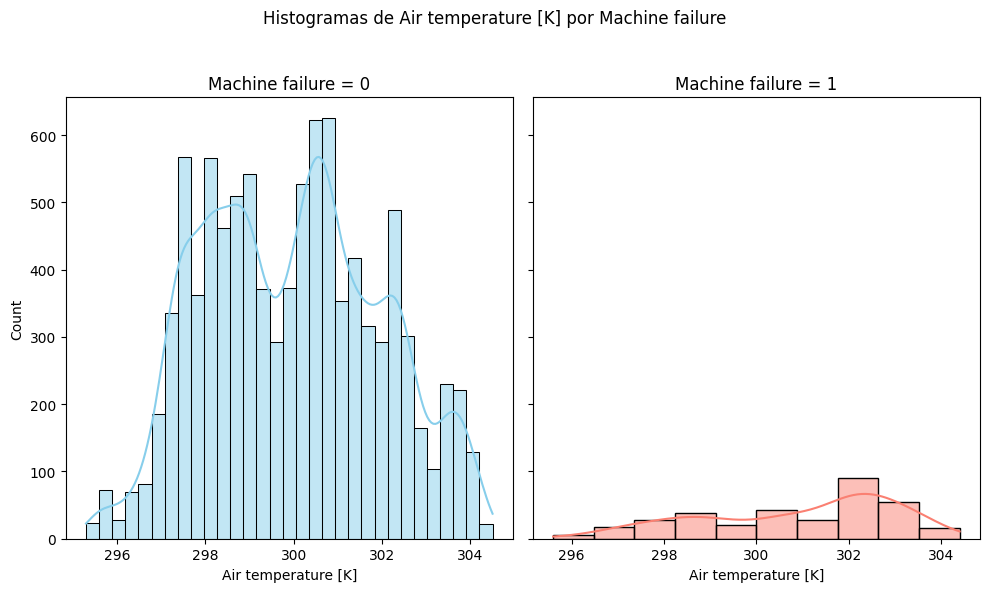

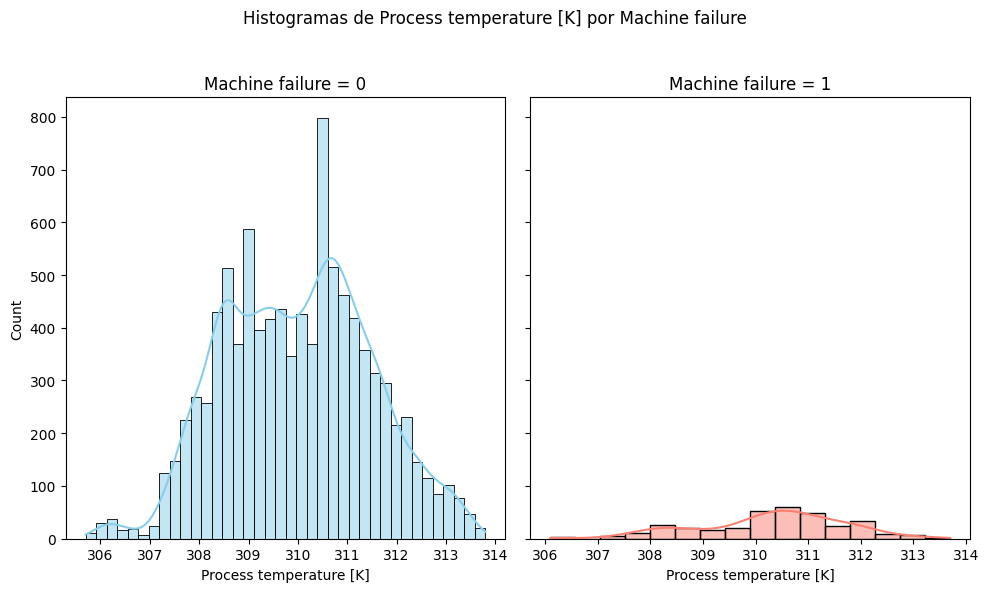

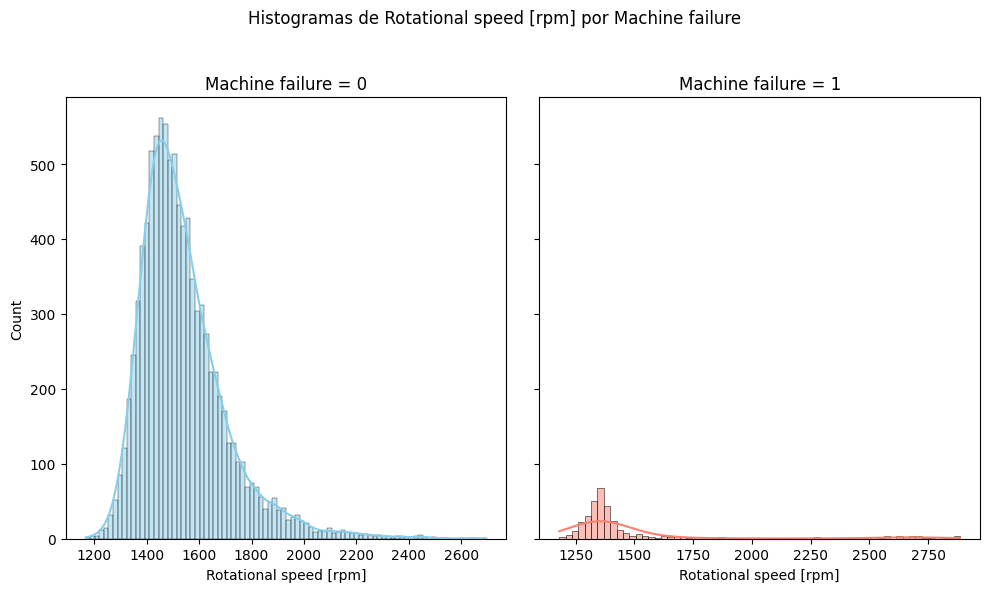

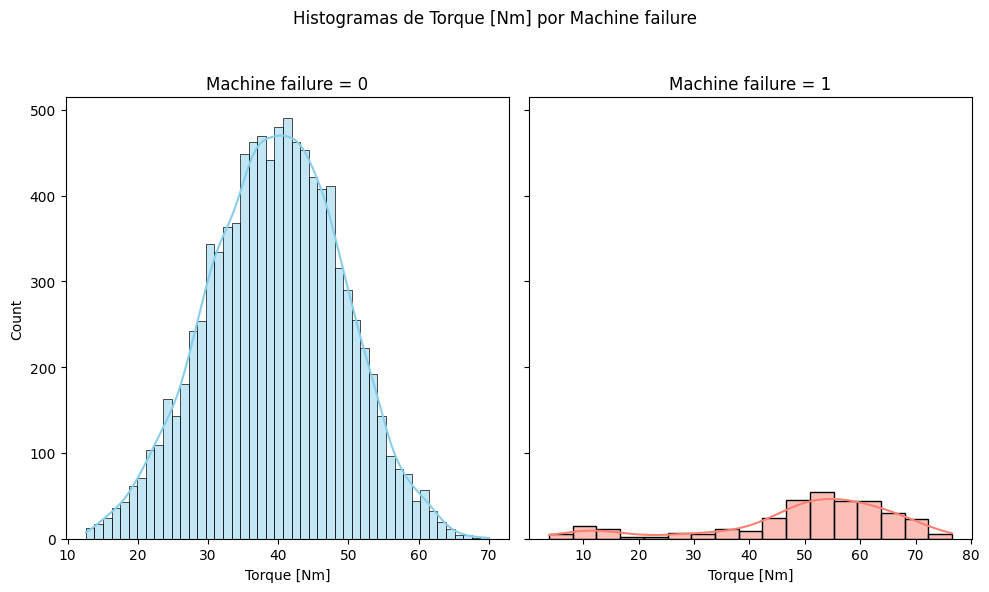

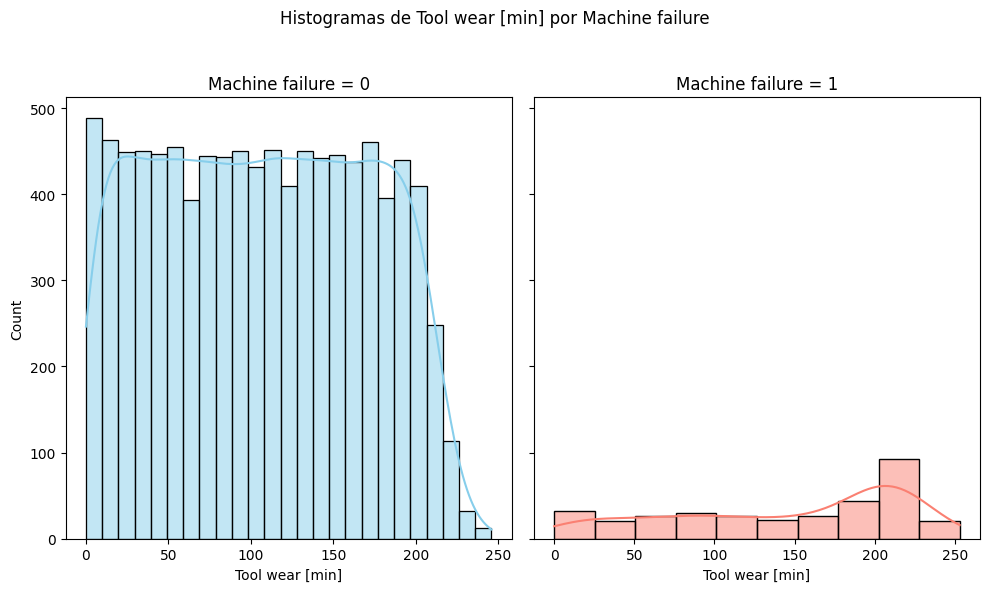

In [5]:
cols_1 = ['Air temperature [K]', 'Process temperature [K]',  'Rotational speed [rpm]',  'Torque [Nm]',  'Tool wear [min]',]

for col in cols_1:
    fig, axes = plt.subplots(1, 2, figsize=(10,6), sharey=True)
    fig.suptitle(f'Histogramas de {col} por Machine failure')
    
    for i, value in enumerate(df['Machine failure'].unique()):
        subset = df[df['Machine failure'] == value]
        sns.histplot(data=subset, x=col, ax=axes[i], color=['skyblue', 'salmon'][i], kde=True)
        axes[i].set_title(f'Machine failure = {value}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

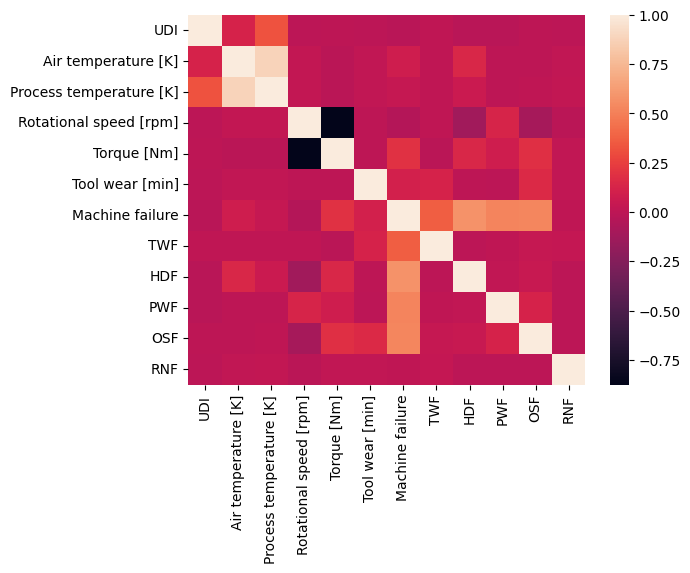

In [6]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr)
plt.show()

**Estimador de Kaplan-Meier**

El estimador de Kaplan-Meier es un estadístico no paramétrico que se utiliza para **estimar la función de supervivencia de datos de tiempo hasta el suceso**. Al ser no paramétrico, no se basa en la suposición de una distribución subyacente específica ni en ninguna otra suposición específica sobre los parámetros de la población. Esto resulta útil cuando no se puede suponer que nuestros datos proceden de una distribución normal y, por tanto, no se puede utilizar la regresión normal en la predicción.

En este modelo, la función de supervivencia S(t) se estima con la fórmula siguiente.

![imagen3](Images/image_3.webp)

La tasa de supervivencia en el momento t es igual al producto del porcentaje de probabilidad de sobrevivir en el momento t y en cada momento anterior.

En Python, esto puede hacerse utilizando el paquete **[lifeline](https://lifelines.readthedocs.io/en/latest/)**. Con este paquete, podemos trazar la función de supervivencia de las observaciones introducidas y hacer predicciones para comprobar la probabilidad de supervivencia en cualquier punto específico de la duración.

In [7]:
from lifelines import KaplanMeierFitter

In [8]:
list(df.columns)

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

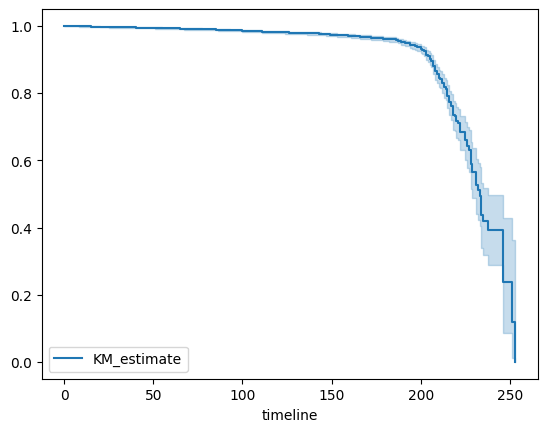

In [9]:
# Inicia un objeto KaplanMeierFitter
kmf = KaplanMeierFitter()

# Ajusta el objeto KaplanMeierFitter a los datos
kmf.fit(durations=df['Tool wear [min]'],
        event_observed=df['Machine failure'])

# Visualizamos la curva de supervivencia
kmf.plot_survival_function()
plt.show()

* Inicio en 100%: La curva empieza en el 100% de probabilidad de supervivencia, lo que indica que inicialmente la gran mayoría máquinas están funcionando sin daños.

* Descenso a lo largo del tiempo: Se observa un descenso gradual en la probabilidad de supervivencia, lo cual sugiere que las máquinas van experimentando daños conforme pasa el tiempo.

* Plataformas estables: En varias partes de la curva, hay plataformas (períodos donde la línea es horizontal), lo que indica intervalos de tiempo donde no se registraron daños en las máquinas. Esto puede deberse a períodos donde las máquinas estaban funcionando bien o no se estaban utilizando.

* Descensos significativos: La curva muestra descensos abruptos en ciertos puntos, especialmente notorios después del tiempo 150, indicando la ocurrencia de uno o varios daños en ese punto. Esto podría corresponder a fallos críticos o a la acumulación de desgaste en las máquinas.

* Intervalos de Confianza: La sombra alrededor de la curva de Kaplan-Meier representa los intervalos de confianza del 95%. El hecho de que estos intervalos se ensanchen con el tiempo sugiere una mayor incertidumbre en las estimaciones de supervivencia a medida que menos máquinas permanecen sin daños.

* Interpretación Final del Tiempo de Estudio: Al final del tiempo de estudio, la probabilidad de que las máquinas permanezcan sin daños es considerablemente menor, lo que indica que un alto porcentaje de ellas ha experimentado algún daño a lo largo del periodo observado.

In [10]:
print(f'El tiempo medio de supervivencia es: {kmf.median_survival_time_} minutos')

El tiempo medio de supervivencia es: 233.0 minutos


El tiempo medio de supervivencia es una estimación del punto en el tiempo en el cual se espera que el 50% de las máquinas haya experimentado el evento de interés (en este caso, un daño). Esto significa que, en promedio, se espera que las máquinas funcionen sin sufrir daños durante 233 minutos. Pasado ese tiempo, la mitad de ellas habría tenido algún tipo de falla o daño.

**Supervivencia por tipo**

En algunos casos, también nos puede interesar comparar la función de supervivencia entre cada grupo de un conjunto de datos, por ejemplo, para comparar la supervivencia entre grupos de edad o categorías de productos. Una forma de realizar esta comparación es visualizar la función de supervivencia de Kaplan-Meier entre los grupos.

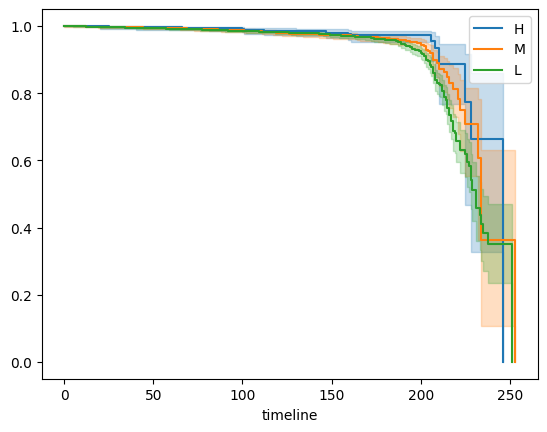

In [11]:
high_machine = df[df['Type']=='H']
medium_machine = df[df['Type']=='M']
low_machine = df[df['Type']=='L']

kmf = KaplanMeierFitter()

# Ajustamos el kmf al grupo High
kmf.fit(durations=high_machine['Tool wear [min]'], event_observed=high_machine['Machine failure'], label='H')

# Creamos un gráfico de la función de supervivencia
surv_plot = kmf.plot_survival_function()

# Ajustamos el kmf a los otros grupos
kmf.fit(durations=medium_machine['Tool wear [min]'], event_observed=medium_machine['Machine failure'], label='M')
kmf.plot_survival_function(ax=surv_plot)

kmf.fit(durations=low_machine['Tool wear [min]'], event_observed=low_machine['Machine failure'], label='L')
kmf.plot_survival_function(ax=surv_plot)

plt.show()

In [12]:
kmf_high = KaplanMeierFitter()
kmf_high.fit(durations=high_machine['Tool wear [min]'], event_observed=high_machine['Machine failure'])

kmf_medium = KaplanMeierFitter()
kmf_medium.fit(durations=medium_machine['Tool wear [min]'], event_observed=medium_machine['Machine failure'])

kmf_low = KaplanMeierFitter()
kmf_low.fit(durations=low_machine['Tool wear [min]'], event_observed=low_machine['Machine failure'])

print(f'El tiempo medio de supervivencia de "high machines" es: {kmf_high.median_survival_time_} minutos')
print(f'El tiempo medio de supervivencia de "medium machines" es: {kmf_medium.median_survival_time_} minutos')
print(f'El tiempo medio de supervivencia de "low machines" es: {kmf_low.median_survival_time_} minutos')

El tiempo medio de supervivencia de "high machines" es: 246.0 minutos
El tiempo medio de supervivencia de "medium machines" es: 234.0 minutos
El tiempo medio de supervivencia de "low machines" es: 231.0 minutos


Para una comparación más precisa desde el punto de vista estadístico, podemos utilizar la prueba de log-rank para realizar pruebas estadísticas sobre la similitud de supervivencia entre estos grupos.

* Lo ejecutamos con la hipótesis nula (H0) de que la tasa de supervivencia entre los grupos es la misma.

* Comprobamos el valor p de la prueba estadística para comprobar la verosimilitud que se habría producido si la hipótesis nula fuera cierta

* Un valor p bajo (p ≤ 0,05) indica que el resultado de la prueba es estadísticamente significativo, lo que significa que debe rechazarse la hipótesis nula

La prueba log-rank compara las probabilidades de supervivencia Si entre grupos en cada tiempo t.

**Prueba de hipótesis de la similitud entre tipos**

H0: las máquinas "high" y "low" tienen el mismo desgaste

Valor P: ¿Cuál es la probabilidad de que los datos se hubieran producido si la hipótesis nula fuera cierta?

(P ≤ 0,05) >> Resultado de la prueba estadísticamente significativo >> significa que la hipótesis de prueba es falsa o debe rechazarse.

In [14]:
from lifelines.statistics import logrank_test

In [23]:
# Corremos la prueba log-rank para comparar maquinas "high" y "low"

test_results = logrank_test(durations_A=high_machine['Tool wear [min]'],
                            durations_B=low_machine['Tool wear [min]'],
                            event_observed_A=high_machine['Machine failure'],
                            event_observed_B=low_machine['Machine failure'])
print(test_results.print_summary)
print(f'p-valor: {test_results.p_value}')

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.66 0.01      7.47>
p-valor: 0.005651291360261188


H0: las máquinas "high" y "medium" tienen el mismo desgaste

Valor P: ¿Cuál es la probabilidad de que los datos se hubieran producido si la hipótesis nula fuera cierta?

(P ≤ 0,05) >> Resultado de la prueba estadísticamente significativo >> significa que la hipótesis de prueba es falsa o debe rechazarse.

In [24]:
# Corremos la prueba log-rank para comparar maquinas "high" y "medium"

test_results = logrank_test(durations_A=high_machine['Tool wear [min]'],
                            durations_B=medium_machine['Tool wear [min]'],
                            event_observed_A=high_machine['Machine failure'],
                            event_observed_B=medium_machine['Machine failure'])
print(test_results.print_summary)
print(f'p-valor: {test_results.p_value}')

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.63 0.10      3.26>
p-valor: 0.10462183115323556


H0: las máquinas "low" y "medium" tienen el mismo desgaste

Valor P: ¿Cuál es la probabilidad de que los datos se hubieran producido si la hipótesis nula fuera cierta?

(P ≤ 0,05) >> Resultado de la prueba estadísticamente significativo >> significa que la hipótesis de prueba es falsa o debe rechazarse.

In [25]:
# Corremos la prueba log-rank para comparar maquinas "low" y "medium"

test_results = logrank_test(durations_A=low_machine['Tool wear [min]'],
                            durations_B=medium_machine['Tool wear [min]'],
                            event_observed_A=low_machine['Machine failure'],
                            event_observed_B=medium_machine['Machine failure'])
print(test_results.print_summary)
print(f'p-valor: {test_results.p_value}')

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.84 0.05      4.32>
p-valor: 0.050074628800765714


**Conclusión**

**Prueba 1:**
* H0: Máquina high y low tienen el mismo desgaste de herramienta mins
* Valor_P = 0.00565
* P < 0.05 >> Se rechaza la hipotesis Nula. La máquina high y la low NO tienen los mismos minutos de desgaste de herramienta.

**Pureba 2:**
* H0: Máquina high y medium tienen los mismos minutos de desgaste de herramienta
* Valor_P = 0.104
* P > 0.05 >> Resultado de la prueba no estadísticamente significativo >> No se puede rechazar H0.

**Prueba 3:**
* H0: Máquina medium y low tienen los mismos minutos de desgaste de herramienta
* Valor_P = 0.05
* P ≤ 0.05 >> Resultado de la prueba estadísticamente significativo >> Máquina medium y low NO tienen los mismos mins de desgaste de herramienta

**Modelo de Weibull**

El estimador de Kaplan-Meier y la prueba log-rank anteriores forman parte del análisis univariante, que modela la supervivencia como una función de una única variable factorial categórica. Para analizar múltiples variantes en funciones de supervivencia, podemos utilizar modelos paramétricos como el modelo de Weibull. Este modelo se basa en el supuesto de distribución de probabilidad continua de la distribución de Weibull.

![imagen_5](Images/image_4.webp)

Donde:

* S(t) es la función de supervivencia en el tiempo t.

* λ (lambda) es el parámetro de escala. En el contexto de la supervivencia, indica el tiempo en el que un porcentaje significativo (usualmente el 63.2%) de la población ha experimentado el evento de interés. En la notación común, este parámetro suele ser η (eta).

* ρ (rho), que se representa habitualmente como β (beta), es el parámetro de forma y determina cómo cambia la tasa de falla: si aumenta, disminuye o se mantiene constante con el tiempo

La interpretación del modelo con esta fórmula sería:

* Para ρ<1: La tasa de falla disminuye con el tiempo, lo que sugiere que existe una "mortalidad decreciente" y que los eventos ocurren más frecuentemente al principio del periodo observado. Esto podría suceder en situaciones donde hay una alta tasa inicial de falla debido a defectos tempranos o problemas de "infant mortality" en la maquinaria.

* Para ρ=1: La tasa de falla es constante con el tiempo, lo cual indica que el evento ocurre de manera aleatoria a lo largo del tiempo y no está influenciado por el desgaste. Esto es equivalente al modelo exponencial.

* Para ρ>1: La tasa de falla aumenta con el tiempo, lo que indica "mortalidad creciente". Esto sugiere que los eventos se vuelven más probables a medida que el tiempo avanza, lo que podría estar relacionado con el desgaste o envejecimiento de la maquinaria.

In [29]:
from lifelines import WeibullFitter

In [30]:
df_new = df[df['Tool wear [min]'] > 0]
df_new.count()

UDI                        9880
Product ID                 9880
Type                       9880
Air temperature [K]        9880
Process temperature [K]    9880
Rotational speed [rpm]     9880
Torque [Nm]                9880
Tool wear [min]            9880
Machine failure            9880
TWF                        9880
HDF                        9880
PWF                        9880
OSF                        9880
RNF                        9880
dtype: int64

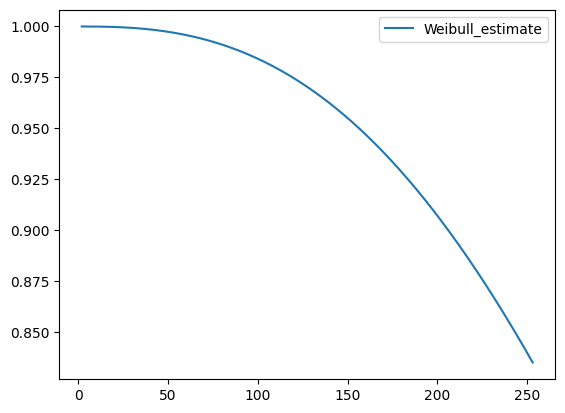

In [31]:
# Instanciamos uno objeto de clase WeibullFitter wb
wb = WeibullFitter()

# Ajustamos los datos a wb
wb.fit(df_new['Tool wear [min]'], df_new['Machine failure'])

# Graficamos la función de supervivencia
wb.survival_function_.plot()
plt.show()

La gráfica de la función de supervivencia Weibull muestra que la probabilidad de que la maquinaria funcione sin fallos disminuye a medida que aumenta el tiempo. La curva comienza en 1 (o 100% de supervivencia) y desciende de forma continua, lo que sugiere que el riesgo de falla aumenta con el tiempo. No hay saltos o caídas repentinas, indicando que el modelo está tratando los datos de una manera suavizada y paramétrica.

In [32]:
wb.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,487.516436,25.244929,438.037285,536.995588,1.0,19.271848,9.257062e-83,272.509478
rho_,2.612034,0.114838,2.386955,2.837112,1.0,14.037452,9.196011e-45,146.285756


Interpretación de los resultados del modelo (summary):

* Lambda (λ): Este es el parámetro de escala del modelo de Weibull. El valor estimado de lambda es aproximadamente 487.5. Esto sugiere que el tiempo característico en el que el 63.2% de las máquinas han fallado es de 487.5 minutos. La estimación es bastante precisa, con un error estándar bajo (25.24), lo que indica que estamos bastante seguros de esta estimación del tiempo de vida promedio antes de un fallo.

* Rho (ρ): El parámetro de forma, con un valor estimado de aproximadamente 2.61. Un valor mayor que 1 indica que la tasa de falla aumenta con el tiempo; en este caso, como ρ es significativamente mayor que 1, podemos confirmar que el riesgo de falla se acelera con el tiempo. Esto puede deberse a desgaste o envejecimiento de la maquinaria.

* Pruebas Estadísticas (coef, z, p):

    * Los valores z para ambos parámetros son bastante altos (19.27 para λ y 14.03 para ρ), lo que indica que los coeficientes son estadísticamente significativamente diferentes de 0.
    * Los valores p son extremadamente pequeños (cercanos a cero), lo que indica que es muy improbable que estos resultados sean producto de la casualidad. Esto significa que ambos parámetros, λ y ρ, son altamente significativos en el modelo.

* Intervalos de Confianza:

    * Los intervalos de confianza del 95% para lambda (438.04 a 536.99) y rho (2.38 a 2.83) no incluyen el 1, lo que refuerza la idea de que ambos parámetros son significativos y que la tasa de falla no es constante sino que aumenta con el tiempo.

* Comparación con Valores de Referencia:

    * El parámetro de comparación ("cmp to") es 1.0, lo que indica que los valores de λ y ρ están siendo comparados contra un valor base de 1.0. Ya que ambos parámetros son significativamente diferentes de este valor de referencia, esto refuerza su importancia en el modelo.

* La conclusión principal de esta interpretación es que las máquinas tienen una vida útil promedio de 487.5 minutos antes de experimentar una falla, y que el riesgo de falla aumenta con el tiempo. Esta información es vital para la planificación del mantenimiento preventivo y las estrategias de reemplazo de maquinaria. Además, sugiere que se deben investigar las causas del aumento de la tasa de falla para implementar medidas correctivas.

In [36]:
# Predecir la probabilidad de supervivencia más allá de 150 unidades de tiempo
wb.predict(150)


0.9550270632261244

 hay un 95% de probabilidad de que la maquinaria no falle antes de alcanzar los 150 minutos

Ahora, miremos como diferentes variables afectan la probabilidad de supervivencia

* `WeibullAFTFitter` es una clase que implementa el modelo AFT (Accelerated Failure Time) asumiendo que el tiempo hasta el evento sigue una distribución de Weibull. El modelo AFT es un tipo de modelo de regresión utilizado en el análisis de supervivencia, que permite modelar el tiempo hasta que ocurre un evento.

* En un modelo AFT, la relación se establece entre el tiempo hasta el evento y las covariables (factores de riesgo o características) a través de una función log-lineal. Esto significa que el logaritmo del tiempo hasta el evento es modelado como una función lineal de las covariables.

* La distribución de Weibull es elegida en este caso debido a su flexibilidad para modelar diversas formas de tasas de fallo, como se discutió anteriormente (tasas de fallo decrecientes, constantes o crecientes).

In [37]:
list(df_new.columns)

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [38]:
df_new = df_new[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']]
df_new

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
5,298.1,308.6,1425,41.9,11,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


In [39]:
from lifelines import WeibullAFTFitter

In [42]:
aft = WeibullAFTFitter()

aft.fit(df_new, duration_col='Tool wear [min]', event_col='Machine failure')

aft.summary

coef     exp(coef)  se(coef)  \
param   covariate                                                    
lambda_ Air temperature [K]      -0.218010  8.041173e-01  0.024523   
        Process temperature [K]   0.204934  1.227443e+00  0.032041   
        Rotational speed [rpm]   -0.003152  9.968528e-01  0.000190   
        Torque [Nm]              -0.076822  9.260551e-01  0.004305   
        Intercept                16.323034  1.227449e+07  4.908651   
rho_    Intercept                 0.964676  2.623939e+00  0.043568   

                                 coef lower 95%  coef upper 95%  \
param   covariate                                                 
lambda_ Air temperature [K]           -0.266073       -0.169947   
        Process temperature [K]        0.142134        0.267733   
        Rotational speed [rpm]        -0.003525       -0.002779   
        Torque [Nm]                   -0.085259       -0.068384   
        Intercept                      6.702255       25.943812   
rho_    Intercept                      0.879285        1.050067   

                                 exp(coef) lower 95%  exp(coef) upper 95%  \
param   covariate                                                           
lambda_ Air temperature [K]                 0.766383         8.437096e-01   
        Process temperature [K]             1.152732         1.306998e+00   
        Rotational speed [rpm]              0.996481         9.972247e-01   
        Torque [Nm]                         0.918274         9.339018e-01   
        Intercept                         814.239970         1.850352e+11   
rho_    Intercept                           2.409178         2.857844e+00   

                                 cmp to          z              p    -log2(p)  
param   covariate                                                              
lambda_ Air temperature [K]         0.0  -8.890210   6.099343e-19   60.507980  
        Process temperature [K]     0.0   6.395985   1.595158e-10   32.545581  
        Rotational speed [rpm]      0.0 -16.561043   1.332631e-61  202.223336  
        Torque [Nm]                 0.0 -17.844865   3.168673e-71  234.193016  
        Intercept                   0.0   3.325361   8.830424e-04   10.145230  
rho_    Intercept                   0.0  22.142039  1.244769e-108  358.452356

* Cada coeficiente bajo "lambda_" corresponde al efecto log-lineal de la covariable asociada en el logaritmo del tiempo de vida. Un coeficiente negativo indica que un aumento en esa covariable disminuye el tiempo esperado hasta el fallo (hace que la falla ocurra más rápido).

* **Covariable: Air temperature [K] (Temperatura del aire)**
    * Coeficiente (coef): -0.218010
    * Un coeficiente negativo implica que un aumento en la temperatura del aire está asociado con una disminución en el tiempo de supervivencia de la maquinaria.
    * Interpretación: Por cada grado Kelvin que aumenta la temperatura del aire, el tiempo hasta el fallo de la maquinaria se reduce.
    * Exponente del coeficiente (exp(coef)): 0.8041173. Este valor es el factor multiplicativo por el cual se espera que cambie el tiempo hasta el evento (fallo de la maquinaria) por cada unidad de incremento en la temperatura del aire.
    * Interpretación: Por cada aumento de 1K en la temperatura del aire, el tiempo de supervivencia de la maquinaria se multiplica por 0.804, es decir, se espera que disminuya en un 19.6%.
    * Error estándar (se(coef)): 0.024523. Indica la variabilidad o incertidumbre en la estimación del coeficiente.
    * Interpretación: Una baja desviación estándar en la estimación del coeficiente sugiere que estamos relativamente seguros de nuestra estimación del efecto de la temperatura del aire.
    * Intervalos de confianza:
    * Coef Lower 95%: -0.266073
    * Coef Upper 95%: -0.169947
    * Interpretación: Estamos 95% seguros de que el verdadero valor del coeficiente de la temperatura del aire está entre estos dos valores. Dado que no cruzan el cero, este efecto es estadísticamente significativo.
    * Prueba de significancia (z, p):
    * Valor z: -8.890210
    * Valor p: 6.099343e-19
    * Interpretación: Un valor z muy negativo y un valor p cercano a cero indican que podemos rechazar la hipótesis nula de que la temperatura del aire no tiene efecto sobre el tiempo de falla de la maquinaria. El efecto es estadísticamente significativo.

* **Covariable: Process temperature [K] (Temperatura del proceso)**
    * Coeficiente (coef): 0.204934
    * Un coeficiente positivo sugiere que un aumento en la temperatura del proceso se asocia con un incremento en el tiempo de supervivencia de la maquinaria.
    * Exponente del coeficiente (exp(coef)): 1.227443
    * Interpretación: Un incremento de 1K en la temperatura del proceso resulta en un tiempo hasta el fallo que es 1.227 veces más largo, lo que representa un aumento del 22.7% en el tiempo de supervivencia.

* **Covariable: Rotational speed [rpm] (Velocidad de rotación)**
    * Coeficiente (coef): -0.003152
    * Interpretación: Por cada aumento de una unidad en la velocidad de rotación (rpm), el tiempo hasta el fallo se reduce ligeramente.
    * Exponente del coeficiente (exp(coef)): 0.9968528
    * Interpretación: Por cada incremento en la velocidad de rotación, el tiempo de supervivencia de la maquinaria se multiplica por aproximadamente 0.997, lo que indica una disminución del tiempo de supervivencia de un 0.3%.

* **Covariable: Torque [Nm] (Par de torsión)**
    * Coeficiente (coef): -0.076822
    * Interpretación: Un aumento en el torque se asocia con una disminución en el tiempo de supervivencia de la maquinaria.
    * Exponente del coeficiente (exp(coef)): 0.9260551
    * Interpretación: Un incremento de una unidad en el par de torsión resulta en un tiempo de supervivencia que es 0.926 veces el original, lo que representa una disminución del 7.4%.

* **Parámetro de forma global: Intercept de rho_ (Intercepto de ρ)**
    * Coeficiente (coef): 0.964676
    * Interpretación: El coeficiente intercepto para ρ cercano a 1 sugiere que el modelo global tiene una tasa de fallo que no varía drásticamente con el tiempo.
    * Exponente del coeficiente (exp(coef)): 2.623939
    * Interpretación: El exponente del intercepto para ρ nos da un factor de cómo el tiempo hasta el fallo se escala globalmente para todas las observaciones en el modelo. Un valor de aproximadamente 2.62 sugiere que, después de ajustar por las covariables, el tiempo hasta el fallo es mayor que el tiempo base (cuando las covariables son cero) por un factor de 2.62.

Miremos ahora graficamente los efectos de diferentes valores en  `Process temperature [k]` sobre la curva de supervivencia

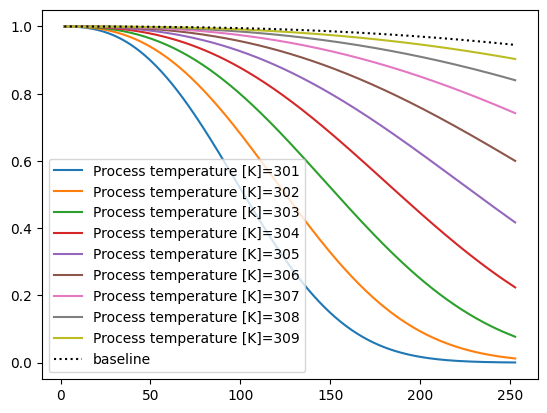

In [44]:
aft.plot_partial_effects_on_outcome(covariates='Process temperature [K]', values=np.arange(301, 310, 1))
plt.show()

**Modelo de riesgos proporcionales de Cox (HPCox)** 

El modelo de riesgos proporcionales de Cox es uno de los modelos que pueden evaluar el efecto de distintos factores sobre la supervivencia. Funciona bajo el supuesto de que las covariables tienen el mismo efecto en todas las observaciones y que no hay interacciones no especificadas entre las variables.
El modelo de riesgos proporcionales de Cox (PH de Cox) es un modelo de regresión que relaciona las covariables con el tiempo transcurrido hasta el evento/duración. Dado que se trata de un modelo de regresión, necesitará una lista de covariables (variables categóricas) relacionadas con la observación que se va a ajustar al modelo, además de los eventos y duraciones en los otros estimadores.

El modelo asume que los riesgos son proporcionales, lo que significa que los efectos de las covariables son multiplicativos con respecto al riesgo de base y constantes en el tiempo. En otras palabras, si una covariable duplica el riesgo de un evento, se espera que este efecto de duplicación sea constante a lo largo del tiempo de estudio, no que el efecto cambie a medida que pasa el tiempo.






In [48]:
from lifelines import CoxPHFitter

In [47]:
cph = CoxPHFitter()
cph.fit(df=df_new, duration_col='Tool wear [min]', event_col='Machine failure')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Air temperature [K],0.510276,1.665751,0.057579,0.397423,0.623129,1.487985,1.864753,0.0,8.862176,7.846762e-19,60.144536
Process temperature [K],-0.529046,0.589167,0.077005,-0.679973,-0.378120,0.506631,0.685148,0.0,-6.870315,6.406042e-12,37.183704
Rotational speed [rpm],0.007997,1.008029,0.000341,0.007329,0.008665,1.007356,1.008703,0.0,23.456754,1.127932e-121,401.779620
Torque [Nm],0.198302,1.219331,0.007228,0.184135,0.212469,1.202179,1.236728,0.0,27.435068,1.047197e-165,548.051603


**Covariable: Air temperature [K]**
   * Coeficiente (coef): 0.510276
   * Interpretación: Por cada aumento de una unidad en la temperatura del aire (1K), el riesgo de fallo de la maquinaria aumenta en un factor de e^0.510276
   * Riesgo relativo (exp(coef)): 1.665751
   * Interpretación: Un aumento de 1K en la temperatura del aire se asocia con un 66.6% de aumento en el riesgo de fallo.

**Covariable: Process temperature [K]**
   * Coeficiente (coef): -0.529046
   * Interpretación: Un incremento de una unidad en la temperatura del proceso (1K) está asociado con una disminución en el riesgo de fallo de la maquinaria.
   * Riesgo relativo (exp(coef)): 0.589167
   * Interpretación: Por cada incremento de 1K en la temperatura del proceso, el riesgo de fallo se reduce en un 41% aproximadamente.

**Covariable: Rotational speed [rpm]**

   *  Coeficiente (coef): 0.007997
   * Interpretación: Un aumento de una unidad en la velocidad de rotación está ligeramente asociado con un incremento en el riesgo de fallo.
   * Riesgo relativo (exp(coef)): 1.008029
   * Interpretación: Cada incremento unitario en la velocidad de rotación aumenta el riesgo de fallo en un 0.8%.

**Covariable: Torque [Nm]**
   * Coeficiente (coef): 0.198302
   * Interpretación: Un incremento de una unidad en el par de torsión se asocia con un aumento en el riesgo de fallo de la maquinaria.
   * Riesgo relativo (exp(coef)): 1.219331
   * Interpretación: Por cada unidad que aumenta el torque, el riesgo de fallo se incrementa en un 21.9%.

**Significancia Estadística (z, p):**
* Para todas las covariables mencionadas, los valores z son altos y los valores p son extremadamente bajos (cercanos a cero), lo que indica que los efectos de estas covariables sobre el riesgo de fallo son estadísticamente significativos.

[Fuente](https://towardsdatascience.com/exploring-time-to-event-with-survival-analysis-8b0a7a33a7be)